# Exploration of Rape Victims in India Dataset

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# configure matplotlib to output inline
%matplotlib inline

In [2]:
# conda install tabulate


In [3]:
# victims of rape DataFrame
rape_victims = pd.read_csv('20_Victims_of_rape.csv')

# let's see how the data is structured
rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [4]:
# let's clean the data a bit
# we don't need the Total Rape Victims subgroup (we can do that in Pandas), let's remove it
rape_victims = rape_victims[rape_victims['Subgroup'] != 'Total Rape Victims']

# let's check if the all the rape cases are reported
rape_victims[rape_victims['Victims_of_Rape_Total'] != rape_victims['Rape_Cases_Reported']].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67


No, they're not.

Okay, let's store the number of unreported rape cases in another column

In [7]:
rape_victims['Unreported_Cases'] = rape_victims['Victims_of_Rape_Total'] - rape_victims['Rape_Cases_Reported']

# let's taka a look at the new dataframe
rape_victims[rape_victims['Unreported_Cases'] > 0].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0,1
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45,2
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31,4
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49,8
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67,3


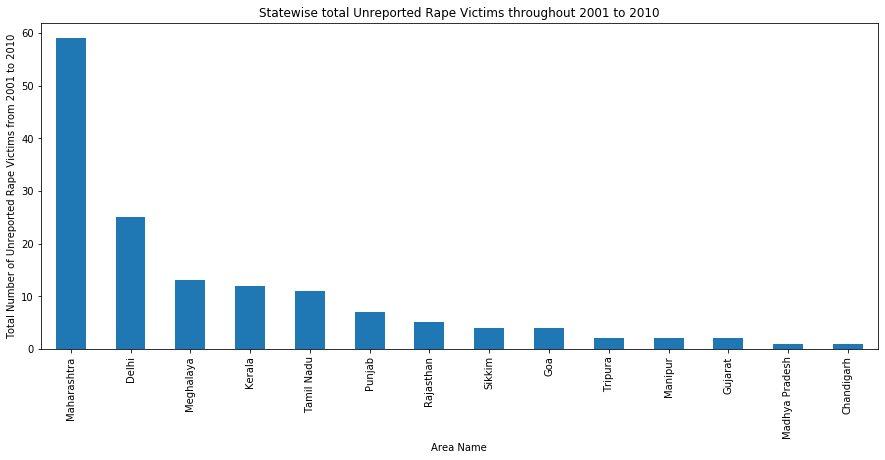

In [8]:
# let's plot the unreported rape cases sorted by states throughout 2001 to 2010
unreported_victims_by_state = rape_victims.groupby('Area_Name').sum()
unreported_victims_by_state.drop('Year', axis = 1, inplace = True)

# let's finally plot it
plt.subplots(figsize = (15, 6))
ct = unreported_victims_by_state[unreported_victims_by_state['Unreported_Cases'] 
                                 > 0]['Unreported_Cases'].sort_values(ascending = False)
#print(ct)
ax = ct.plot.bar()
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Unreported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Unreported Rape Victims throughout 2001 to 2010')
plt.show()

Looks like Maharastra has the most number of unreported rape cases.

In [9]:
# let's take some general data and plot some simple charts
rape_victims_by_state = rape_victims.groupby('Area_Name').sum()
rape_victims_by_state.drop('Year', axis = 1, inplace = True)
print('Total Rape Victims = ' ,rape_victims_by_state['Rape_Cases_Reported'].sum())
rape_victims_by_state.sort_values(by = 'Rape_Cases_Reported', ascending = False).head()

Total Rape Victims =  190008


,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
Area_Name,,,,,,,,,
Madhya Pradesh,29256,181,2499,5554,14532,5783,29257,708,1
West Bengal,16378,10,156,273,12586,3290,16378,63,0
Uttar Pradesh,15053,12,1424,3092,8076,2086,15053,363,0
Maharashtra,14446,63,1305,4152,6560,1485,14505,940,59
Assam,12762,95,153,409,8507,3552,12762,46,0


With an heatmap, we can show the number of statewise victims based on their age groups

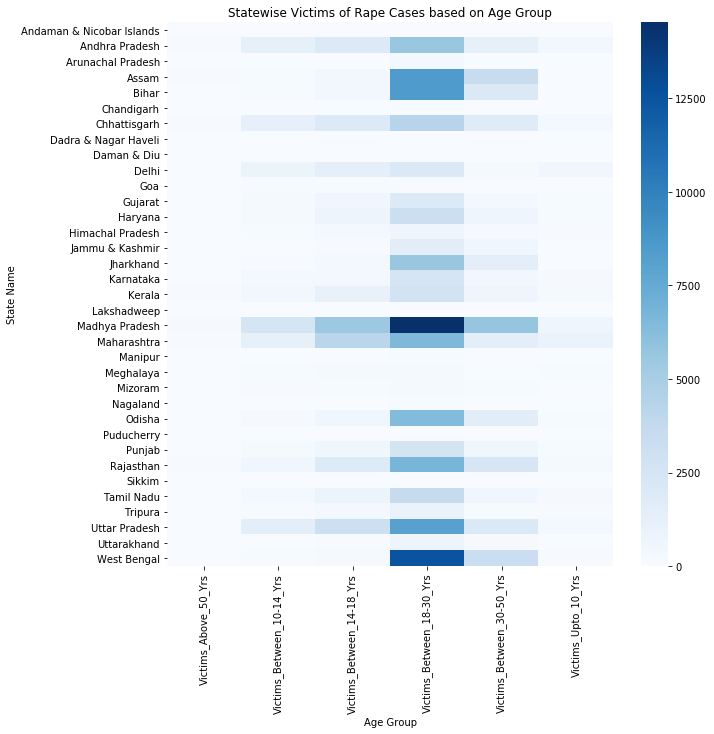

In [10]:
# let's make a heatmap variable
rape_victims_heatmap = rape_victims_by_state.drop(['Rape_Cases_Reported', 
                                                   'Victims_of_Rape_Total', 
                                                   'Unreported_Cases'], axis = 1)
plt.subplots(figsize = (10, 10))
ax = sns.heatmap(rape_victims_heatmap, cmap="Blues")
ax.set_xlabel('Age Group')
ax.set_ylabel('State Name')
ax.set_title('Statewise Victims of Rape Cases based on Age Group')
plt.show()

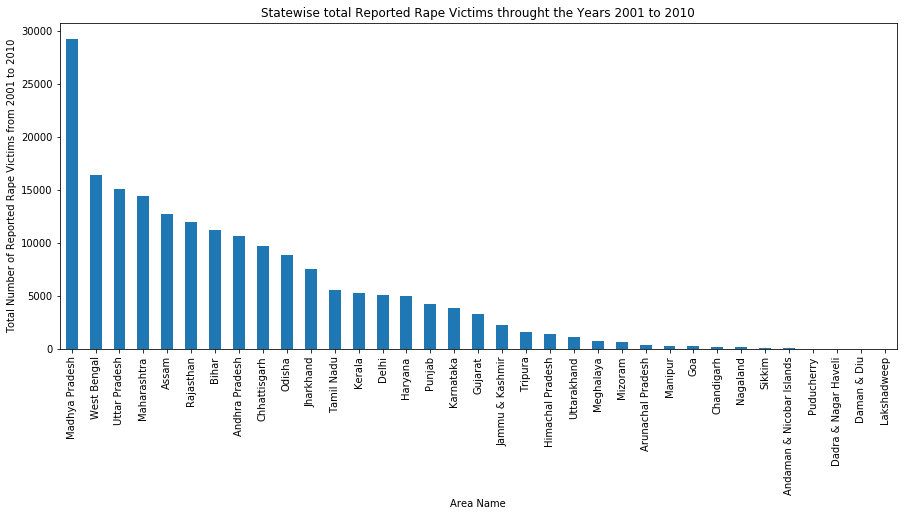

Area_Name
Madhya Pradesh               29256
West Bengal                  16378
Uttar Pradesh                15053
Maharashtra                  14446
Assam                        12762
Rajasthan                    11949
Bihar                        11263
Andhra Pradesh               10696
Chhattisgarh                  9751
Odisha                        8860
Jharkhand                     7563
Tamil Nadu                    5538
Kerala                        5296
Delhi                         5146
Haryana                       5009
Punjab                        4300
Karnataka                     3917
Gujarat                       3337
Jammu & Kashmir               2230
Tripura                       1624
Himachal Pradesh              1453
Uttarakhand                   1101
Meghalaya                      726
Mizoram                        646
Arunachal Pradesh              412
Manipur                        271
Goa                            266
Chandigarh                     227
Nagaland  

In [8]:
# let's first plot only the total number of rape cases reported in each state
plt.subplots(figsize = (15, 6))
ct = rape_victims_by_state['Rape_Cases_Reported'].sort_values(ascending = False)
#print(ct)
ax = ct.plot.bar()
#ax = sns.barplot(x = rape_victims_by_state.index, y = rape_victims_by_state['Rape_Cases_Reported'])
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Reported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Reported Rape Victims throught the Years 2001 to 2010')
plt.show()
print(ct)

Madhya Pradesh has the most number of rape victims throughout the timespan, West Bengal coming second to it with almost half number of reported rape victims.

Let's have a look at Madhya Pradesh First

# Exploring Data for Madhya Pradesh

In [9]:
mp_rape_victims = rape_victims[rape_victims['Area_Name'] == 'Madhya Pradesh']

# let's have a look in the data
mp_rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
571,Madhya Pradesh,2001,Victims of Incest Rape,301,0,39,66,130,56,301,10,0
572,Madhya Pradesh,2001,Victims of Other Rape,2550,27,265,491,1120,571,2550,76,0
574,Madhya Pradesh,2002,Victims of Incest Rape,72,1,11,16,37,4,72,3,0
575,Madhya Pradesh,2002,Victims of Other Rape,2819,13,174,236,1512,807,2819,77,0
577,Madhya Pradesh,2003,Victims of Incest Rape,123,0,10,23,71,16,123,3,0


## Yearly plot of the number of rape victims in Madhya Pradesh

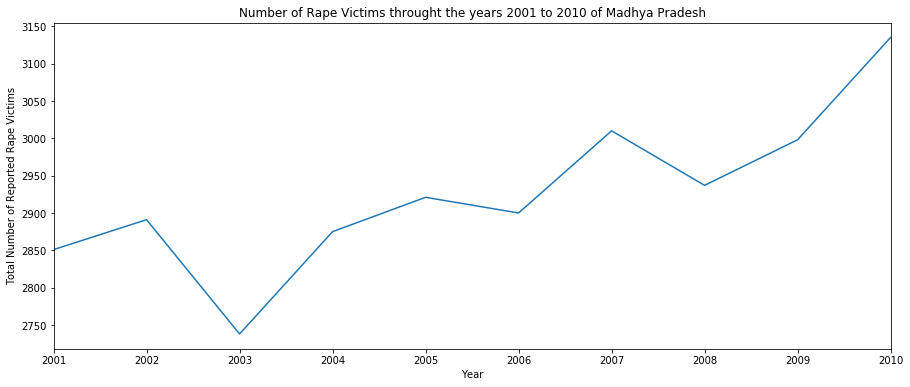

In [10]:
# Let's have a look at yearly distribution of number of rape victims in Madhya Pradesh
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

# plotting the data
plt.subplots(figsize = (15, 6))
ax = mp_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims', 
       title = 'Number of Rape Victims throught the years 2001 to 2010 of Madhya Pradesh')
plt.show()

Previously, when exploring the data set, we've also seen an index for incest rape cases. Let's compare the numbers of incest rape cases to other rape cases for the sate of Madhya Pradesh

## Yearly Distribution of Number of Incest Rape Victims in Madhya Pradesh

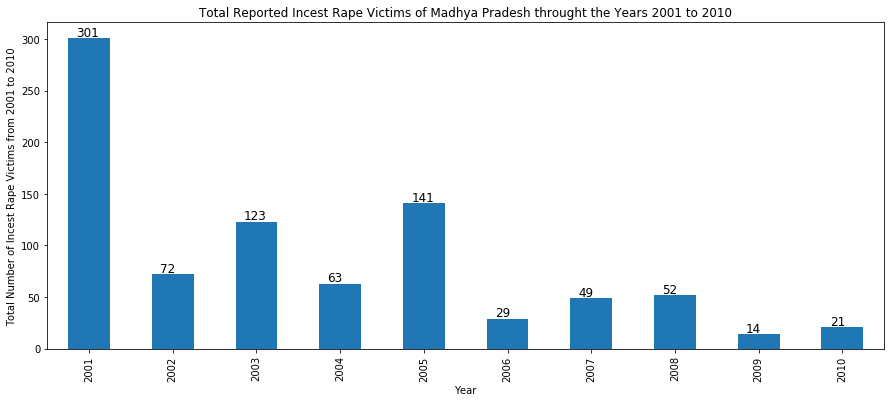

In [11]:
# let's first see the mp_rape_victims dataframe
#mp_rape_victims.head()

# plot the dataframe
mp_incest_rape_cases = mp_rape_victims[mp_rape_victims['Subgroup'] == 'Victims of Incest Rape']
plt.subplots(figsize = (15,6))
ct = mp_incest_rape_cases.groupby('Year').sum()
ax = ct['Rape_Cases_Reported'].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2),fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims from 2001 to 2010')
ax.set_title('Total Reported Incest Rape Victims of Madhya Pradesh throught the Years 2001 to 2010')
plt.show()

What happened in 2001?

A total of 301 incest rapes were reported that year.

# Data for West Bengal

As West Bengal is my home state, I'll take a look at West Bengal, but using the same methods.

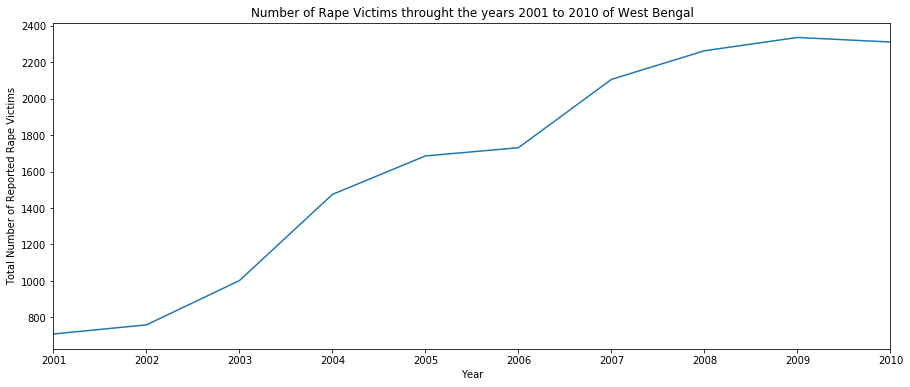

In [12]:
wb_rape_victims = rape_victims[rape_victims['Area_Name'] == 'West Bengal']

# Let's have a look at yearly distribution of number of rape victims in Madhya Pradesh
wb_rape_victims_by_year = wb_rape_victims.groupby('Year').sum()

# plotting the data
plt.subplots(figsize = (15, 6))
ax = wb_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims',
       title = 'Number of Rape Victims throught the years 2001 to 2010 of West Bengal')
plt.show()

This is unfortunate, while we've seen a random trend in the number of rape victims in Madhya Pradesh, although we've also seen an overall increase. But in West Bengal, the plot shows a clear trend of yearly increasing number of rapes (except for 2006, where the number was almost constant). However, the numbers are very disappointing.

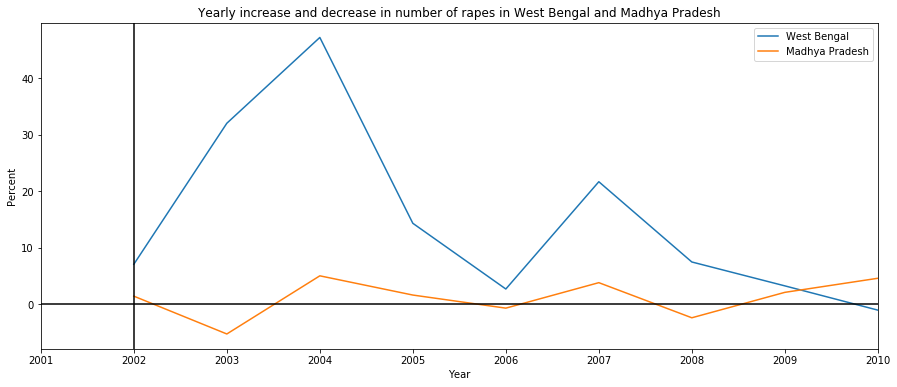

Overall Increase in number of rapes in West Bengal = 69.32 Percent
Overall Increase in number of rapes in Madhya Pradesh = 12.29 Percent


In [13]:
# let's calculate the percentage increase of number of rapes in West Bengal and compare 
# it with Madhya Pradesh
plt.subplots(figsize = (15, 6))
ax = (wb_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(legend = True, 
                                                                              label = 'West Bengal')
(mp_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(ax = ax, legend = True, 
                                                                         label = 'Madhya Pradesh')
ax.set(xlabel = 'Year', ylabel = 'Percent', 
       title = 'Yearly increase and decrease in number of rapes in West Bengal and Madhya Pradesh')
ax.axhline(0, color = 'black')
ax.axvline(2002, color = 'black')
plt.show()
print('Overall Increase in number of rapes in West Bengal =', 
      '{0:.2f}'.format(((wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] 
                         - wb_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])
                        /wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')
print('Overall Increase in number of rapes in Madhya Pradesh =', 
      '{0:.2f}'.format(((mp_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] 
                         - mp_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])
                        /wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')

We can clearly see that overall increase in west bengal is much higher. Also, it's clear that the increase is consistant in West Bengall till 2010.

However, in Madhya Pradesh, there's both increase and decrease in the number of rapes throught the years. Although the overall number of rapes is much higher than that of West Bengal, but the percentage of increase/decrease says that Madhya pradesh is a much safer state.

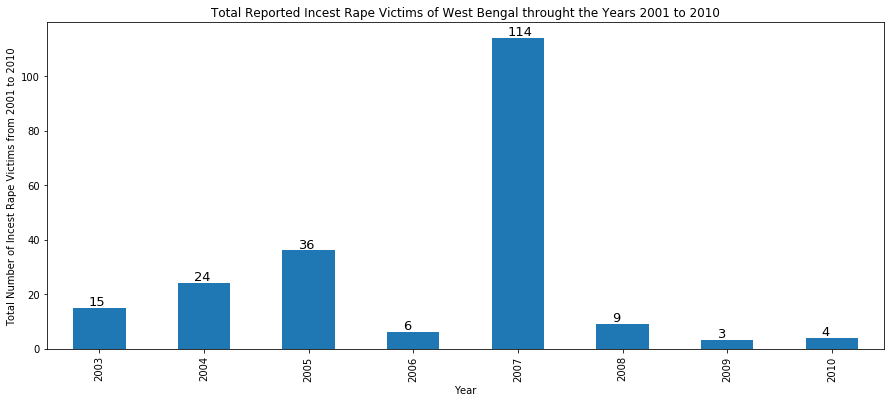

In [14]:
# incest rape cases in Bengal
wb_incest_rape_cases = wb_rape_victims[wb_rape_victims['Subgroup'] == 'Victims of Incest Rape']
plt.subplots(figsize = (15,6))
ct = wb_incest_rape_cases.groupby('Year').sum()
ax = ct[ct['Rape_Cases_Reported'] > 0]['Rape_Cases_Reported'].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + .15, p.get_height()+1),fontsize=13)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims from 2001 to 2010')
ax.set_title('Total Reported Incest Rape Victims of West Bengal throught the Years 2001 to 2010')
plt.show()

Looks like 2007 was a very shameful year of West Bengal, the most number of incest rape cases happened in 2007, a total of 114..
Also, if we compare it to Madhya Pradesh, no incest rape cases were reported for the year 2001 an 2002

I have not explored the other states because the process would be repeatative and you can also do it yourself by forking the notebook and changing some simple values.